In [21]:
import cv2.cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt


In [82]:
# Read the original image
IMAGES_FOLDER = "C:\\Users\\arthur.morais\\Desktop\\code_projects\\grad_cam_code\\datasets\\ct_scan_3\\val\\COVID-positive\\17_Zhao_2020.02.11.20022053-p12-67%0.png"
original_image = cv2.imread(IMAGES_FOLDER)

# Define boundary rectangle containing the foreground object
height, width, _ = original_image.shape
left_margin_proportion = 0.01
right_margin_proportion = 0.01
up_margin_proportion = 0.01
down_margin_proportion = 0.01

boundary_rectangle = (
    int(width * left_margin_proportion),
    int(height * up_margin_proportion),
    int(width * (1 - right_margin_proportion)),
    int(height * (1 - down_margin_proportion)),
)

# Set the seed for reproducibility purposes
cv2.setRNGSeed(0)

# Initialize GrabCut mask image, that will store the segmentation results
mask = np.zeros((height, width), np.uint8)

# Arrays used by the algorithm internally
background_model = np.zeros((1, 65), np.float64)
foreground_model = np.zeros((1, 65), np.float64)

number_of_iterations = 10

cv2.grabCut(
    img=original_image,
    mask=mask,
    rect=boundary_rectangle,
    bgdModel=background_model,
    fgdModel=foreground_model,
    iterCount=number_of_iterations,
    mode=cv2.GC_INIT_WITH_RECT,
)


grabcut_mask = np.where((mask == cv2.GC_PR_BGD) | (mask == cv2.GC_BGD), 0, 1).astype(
    "uint8"
)
segmented_image = original_image.copy() * grabcut_mask[:, :, np.newaxis]

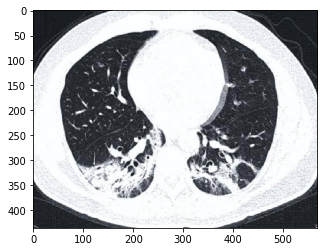

In [83]:
plt.imshow(original_image.astype(int), cmap='Greys')

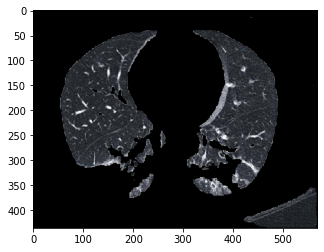

In [84]:
plt.imshow(segmented_image.astype(int), cmap='Greys')

In [33]:
import tensorflow as tf

In [34]:
image_name = 'test_seg'
tf.keras.utils.save_img(
   path="C:\\Users\\arthur.morais\\Desktop\\code_projects\\grad_cam_code\\datasets\\{}".format(image_name),
   x=segmented_image, 
   data_format=None, 
   file_format='png', 
   scale=True
)

In [35]:
segmented_image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [37]:
from tensorflow import keras


In [39]:
img_path = "C:\\Users\\arthur.morais\\Desktop\\code_projects\\grad_cam_code\\datasets\\ct_scan_6\\val\\COVID-positive\\ctrst_version_13_Bjorke_95.png"
img = keras.preprocessing.image.load_img(img_path, target_size=(180, 180))
# `array` is a float32 Numpy array of shape (size, 3)
array = keras.preprocessing.image.img_to_array(img)

In [16]:
IMAGES_FOLDER = "C:\\Users\\arthur.morais\\Desktop\\code_projects\\grad_cam_code\\datasets\\ct_scan_3\\val\\COVID-positive\\6_Rahimzadeh_137covid_patient9_SR_4_IM00026.png"
original_image = cv2.imread(IMAGES_FOLDER)

In [43]:
original_image

array([[[12, 10, 10],
        [10, 28, 28],
        [20,  9,  9],
        ...,
        [18,  6,  6],
        [11, 24, 24],
        [19, 11, 11]],

       [[12, 13, 13],
        [17,  9,  9],
        [17, 12, 12],
        ...,
        [13, 23, 23],
        [18, 16, 16],
        [11, 27, 27]],

       [[17, 10, 10],
        [19,  8,  8],
        [19,  8,  8],
        ...,
        [17,  6,  6],
        [16, 12, 12],
        [18,  6,  6]],

       ...,

       [[55, 35, 35],
        [76, 14, 14],
        [70, 40, 40],
        ...,
        [27, 19, 19],
        [33, 23, 23],
        [32, 35, 35]],

       [[58, 28, 28],
        [72, 33, 33],
        [76, 21, 21],
        ...,
        [27, 35, 35],
        [28, 33, 33],
        [31, 39, 39]],

       [[63, 16, 16],
        [73, 25, 25],
        [62, 46, 46],
        ...,
        [24, 34, 34],
        [27, 25, 25],
        [38, 19, 19]]], dtype=uint8)

In [44]:
array

array([[[10., 10., 12.],
        [28., 28., 10.],
        [ 9.,  9., 20.],
        ...,
        [ 6.,  6., 18.],
        [24., 24., 11.],
        [11., 11., 19.]],

       [[13., 13., 12.],
        [ 9.,  9., 17.],
        [12., 12., 17.],
        ...,
        [23., 23., 13.],
        [16., 16., 18.],
        [27., 27., 11.]],

       [[10., 10., 17.],
        [ 8.,  8., 19.],
        [ 8.,  8., 19.],
        ...,
        [ 6.,  6., 17.],
        [12., 12., 16.],
        [ 6.,  6., 18.]],

       ...,

       [[35., 35., 55.],
        [14., 14., 76.],
        [40., 40., 70.],
        ...,
        [19., 19., 27.],
        [23., 23., 33.],
        [35., 35., 32.]],

       [[28., 28., 58.],
        [33., 33., 72.],
        [21., 21., 76.],
        ...,
        [35., 35., 27.],
        [33., 33., 28.],
        [39., 39., 31.]],

       [[16., 16., 63.],
        [25., 25., 73.],
        [46., 46., 62.],
        ...,
        [34., 34., 24.],
        [25., 25., 27.],
        [19., 19., 38.]]